<img style="float: right;" width="120" src="https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/images/neueda-logo.jpeg">
<br><br><br>

## Simple Linear Regression Demonstration

We're using the python libraries scikit-learn and pandas

#### Step 1: Load, Clean & Analyse the data

Load the training data from a csv (comma separated values) file.

In [1]:
import pandas as pd

df = pd.read_csv('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/ml_fc/demo2_data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Do a quick plot of the data to check is the relationship betweeen the variables broadly linear.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1efa96ac10>,
      dtype=object)

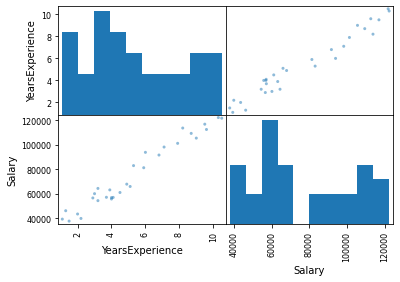

In [2]:
# use scatter_matrix from pandas.plotting
from pandas.plotting import scatter_matrix
scatter_matrix(df)

### Step 2: Decide what are the predictors and what are the output variables
Separate the 'input' and 'output' variables.

In [4]:
# Cause -> "independant variable set"
X = df[['YearsExperience']]
# Effect -> "dependant variable"
y = df['Salary']

#### Step 3: "train-test-split"

We need to measure the accuracy of the model __after__ it's trained. We want to use fresh data that wasn't used during training for this. So, we split the data into a "training" and "testing" set.

The "training" set is used for the model to identify patterns (train the model). The "testing" set is used to measure how accurate the model is after training. 

In this simple example we keep 20% of the data aside to test the model later. The remaining 80% of data will be used to train the model. The 80/20 split here is random.

In [5]:
# use train_test_split from sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#### Step 4: Choose and train a model
Train a simple linear regression model on the training data.

In [7]:
# create a model from sklearn.linear_model.LinearRegression
# train the model (fit)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

#### Step 5: Examine & Measure the results 

Firstly, let's take a look at what has been done on a plot.

Plot:

* **Blue:** the model's prediction line.
* **Red:** the data that was given to the model to train it.
* **Green:** the data kept for testing.

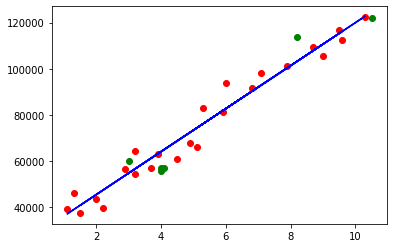

In [9]:
# on the same axes
# plot the training data, test data with matplotlib scatter
# plot the line of regression generated by the model
import matplotlib.pyplot as plt

plt.scatter(x_train,y_train,color='r')
plt.scatter(x_test,y_test,color='g')

plt.plot(x_train,model.predict(x_train),color='b')

This model could now be used to build analytics, or it could be "deployed" to make predictions for new data

For example "What salary should I expect if I have 4 years experience?":

In [10]:
# predict the salary if years experience is 4

model.predict([[4]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([64126.6224631])

To get a more formal accuracy score of how well the model predicts the 20% of data that was kept aside we could use a number of statistical formulas.

A common measure is the "R2 score". We won't get into the details here, but a simple definition of this would be:

```r2_score = (total variance explained by model) / total variance```

In [12]:
# use r2_score from sklearn.metrics
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(x_test))

0.9320502505687087

#### Further Steps
More model algorithms are available to achieve similar results.

For example, we could try a different linear regression model to see how they compare.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [13]:
from sklearn.linear_model import Ridge

# create a Ridge model object
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

# check the accuracy of this new model with the test data
r2_score(y_test, ridge_model.predict(x_test))

0.9313564110162371